# **Initial Run**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# modify "customized_path_to_project", path of folder in drive, where you have stored your project
customized_path_to_ravdees = "/content/drive/MyDrive/Colz_Project/Ravdees_Project"
sys.path.append(customized_path_to_ravdees)
customized_path_to_tess = "/content/drive/MyDrive/Colz_Project/Tess"
sys.path.append(customized_path_to_tess)

# **Data Exploration (Run)**

# Ravdees

In [5]:
Ravdess = os.path.join(customized_path_to_ravdees)
ravdess_directory_list = os.listdir(Ravdess)

empty = []
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess+'/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        if int(part[2]) == 3:
          file_emotion.append(int(part[2]))
          file_path.append(Ravdess+'/' + dir + '/' + file)
        elif int(part[2]) == 4:
          file_emotion.append(int(part[2]))
          file_path.append(Ravdess+'/' + dir + '/' + file)
        elif int(part[2]) == 5:
          file_emotion.append(int(part[2]))
          file_path.append(Ravdess+'/' + dir + '/' + file)
        else:
          empty.append(int(part[2]))

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({3:'happy', 4:'sad', 5:'angry'}, inplace=True)
Ravdess_df.head()


,Emotions,Path
0,happy,/content/drive/MyDrive/Colz_Project/Ravdees_Pr...
1,angry,/content/drive/MyDrive/Colz_Project/Ravdees_Pr...
2,happy,/content/drive/MyDrive/Colz_Project/Ravdees_Pr...
3,happy,/content/drive/MyDrive/Colz_Project/Ravdees_Pr...
4,sad,/content/drive/MyDrive/Colz_Project/Ravdees_Pr...


# Tess

In [6]:
Tess = os.path.join(customized_path_to_tess)
tess_directory_list = os.listdir(Tess)

empty = []
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess +'/' + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='happy':
          file_emotion.append('happy')
          file_path.append(Tess+'/' + dir + '/' + file)
        elif part == 'sad':
          file_emotion.append('sad')
          file_path.append(Tess+'/' + dir + '/' + file)
        elif part == 'angry':
          file_emotion.append('angry')
          file_path.append(Tess+'/' + dir + '/' + file)
        else:
          empty.append('Unknown')


# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/Colz_Project/Tess/OAF_a...
1,angry,/content/drive/MyDrive/Colz_Project/Tess/OAF_a...
2,angry,/content/drive/MyDrive/Colz_Project/Tess/OAF_a...
3,angry,/content/drive/MyDrive/Colz_Project/Tess/OAF_a...
4,angry,/content/drive/MyDrive/Colz_Project/Tess/OAF_a...


# Concatenate all two

In [7]:
Total_df = pd.concat([Tess_df,Ravdess_df])
custom_order = ['angry', 'happy', 'sad']
Total_df['Emotions'] = pd.Categorical(Total_df['Emotions'], categories=custom_order, ordered=True)
Total_df.sort_values('Emotions', inplace=True)
Total_df.reset_index(drop=True, inplace=True)
Total_df


,Emotions,Path
0,angry,/content/drive/MyDrive/Colz_Project/Tess/OAF_a...
1,angry,/content/drive/MyDrive/Colz_Project/Tess/YAF_a...
2,angry,/content/drive/MyDrive/Colz_Project/Tess/YAF_a...
3,angry,/content/drive/MyDrive/Colz_Project/Tess/YAF_a...
4,angry,/content/drive/MyDrive/Colz_Project/Tess/YAF_a...
...,...,...
1771,sad,/content/drive/MyDrive/Colz_Project/Tess/YAF_s...
1772,sad,/content/drive/MyDrive/Colz_Project/Tess/YAF_s...
1773,sad,/content/drive/MyDrive/Colz_Project/Tess/YAF_s...
1774,sad,/content/drive/MyDrive/Colz_Project/Tess/YAF_s...


# **Data Visualisation and Exploration**

In [8]:
Total_df['Emotions'].value_counts()

angry    592
happy    592
sad      592
Name: Emotions, dtype: int64

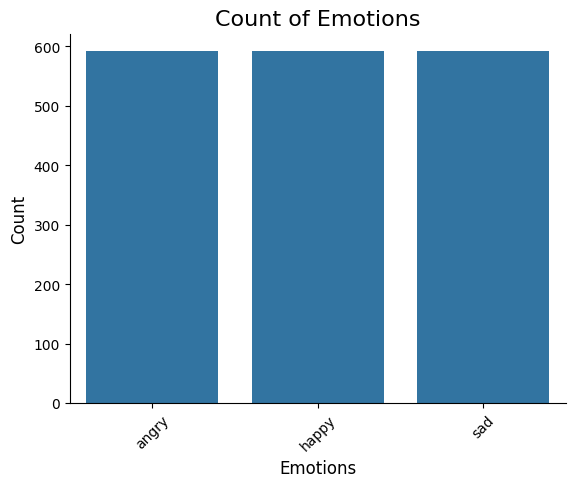

In [9]:
emotion_counts = Total_df['Emotions'].value_counts()
plt.title('Count of Emotions', size=16)
sn.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sn.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

# **Feature extration without noise**

In [10]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [11]:
extract_mfcc(Total_df['Path'][0])

array([-4.6573264e+02,  9.8773727e+01,  6.5601397e-01, -3.2745438e+01,
       -1.1261919e+01,  1.2688794e+01, -1.1675326e+00, -3.4115884e+00,
       -1.0514170e+01,  4.3031468e+00, -1.2010702e+01,  1.0480852e+01,
       -1.3955754e+00,  2.2061906e+00,  3.5589051e-01,  4.8080608e-01,
       -7.5943336e+00, -5.1553240e+00, -2.2488463e+00, -9.0435171e+00,
       -4.9952817e+00, -2.7404325e+00, -3.4408398e+00,  1.7989961e+00,
        9.2685728e+00,  2.0041677e+01,  2.1014477e+01,  2.4858149e+01,
        9.8788776e+00,  5.8788090e+00,  3.3304558e+00,  8.7439203e+00,
        1.2142038e+01,  2.9907460e+00,  2.1098936e+00, -2.3875327e+00,
        2.0273125e+00,  8.6807041e+00,  4.1736588e+00,  3.2589710e+00],
      dtype=float32)

In [12]:
X_mfcc = Total_df['Path'].apply(lambda x: extract_mfcc(x))

In [14]:
X_mfcc

0       [-465.73264, 98.77373, 0.65601397, -32.745438,...
1       [-366.9844, 57.71101, -6.1320124, 24.701168, -...
2       [-376.3947, 38.302174, 0.95465195, 18.862175, ...
3       [-313.5341, 64.24772, 8.541653, 6.5386653, -47...
4       [-386.6295, 85.20671, 24.021791, 6.981123, -42...
                              ...                        
1771    [-422.06702, 67.7146, 32.768074, 23.11866, 6.9...
1772    [-408.70416, 85.658775, 20.022936, 34.696617, ...
1773    [-422.66013, 104.21276, 32.023544, 36.860615, ...
1774    [-399.5028, 97.93138, 27.4383, 35.184402, -5.4...
1775    [-483.11185, 88.74256, -15.786054, 19.138685, ...
Name: Path, Length: 1776, dtype: object

In [15]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1776, 40)

In [16]:
## input split
X = np.expand_dims(X, -1)
X.shape

(1776, 40, 1)

In [17]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Total_df[['Emotions']])

In [ ]:
y = y.toarray()

In [18]:
y.shape

(1776, 3)

# **Split your dataset into training and testing sets**

In [19]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels for both clean and noisy data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, random_state=42)

# Further split the training set into training and validation sets
X_validation, X_test, y_validation, y_test =  train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (355, 40, 1)
y_train shape: (355, 3)
X_validation shape: (710, 40, 1)
y_validation shape: (710, 3)
X_test shape: (711, 40, 1)
y_test shape: (711, 3)


# **model**

In [20]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from keras.layers import *
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import Loss
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [21]:
model = Sequential()
model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.3))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))

In [22]:
# to train without noise
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_validation, y_validation))

Epoch 1/100


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5571, in categorical_crossentropy
        target = tf.convert_to_tensor(target)

    TypeError: Failed to convert elements of SparseTensor(indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64), values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32), dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.


In [ ]:
model.summary()

In [ ]:
# Retrieve the best validation accuracy and the epoch at which it occurred
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_epoch = history.history['val_accuracy'].index(best_val_accuracy)

print("Best Validation Accuracy:", best_val_accuracy)
print("Epoch with Best Validation Accuracy:", best_val_accuracy_epoch + 1)

In [ ]:
# Get training and validation loss and accuracy from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.set_title('Loss')
ax1.plot(training_loss, label='Training Loss')
ax1.plot(validation_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.set_title('Accuracy')
ax2.plot(training_accuracy, label='Training Accuracy')
ax2.plot(validation_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.savefig('loss_accuracy.png')
plt.show()